In [214]:
!pip install --upgrade mplfinance # Installing mplfinance library

In [215]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [216]:
# Load the Dataset
data = pd.read_csv('HDFC_Uncleaned.csv')

In [217]:
# Check the first and last rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

print("\nLast 5 rows of the dataset:")
print(data.tail())

First 5 rows of the dataset:
         Date Symbol Series  Prev Close   Open    High    Low   Last   Close  \
0  2000-01-03   HDFC     EQ      271.75  293.5  293.50  293.5  293.5  293.50   
1  2000-01-04   HDFC     EQ      293.50  317.0  317.00  297.0  304.0  304.05   
2  2000-01-05   HDFC     EQ      304.05  290.0  303.90  285.0  295.0  292.80   
3  2000-01-06   HDFC     EQ      292.80  301.0  314.00  295.0  296.0  296.45   
4  2000-01-07   HDFC     EQ      296.45  290.0  296.35  281.0  287.1  286.55   

     VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  293.50   22744  6.675364e+11     NaN                 NaN          NaN  
1  303.62  255251  7.749972e+12     NaN                 NaN          NaN  
2  294.53  269087  7.925368e+12     NaN                 NaN          NaN  
3  300.14  305916  9.181669e+12     NaN                 NaN          NaN  
4  288.80  197039  5.690480e+12     NaN                 NaN          NaN  

Last 5 rows of the dataset:
           

In [218]:
# Check Number of Rows and Columns in the Dataframe
data.shape

(5571, 15)

Number of Columns: 15<br>Number of Rows: 5571

In [219]:
# Summary statistics of the dataset
print("\nSummary statistics:")
data.describe()



Summary statistics:


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5.571000e+03,5.571000e+03,2577.000000,5.028000e+03,5028.000000
mean,1282.218731,1337.116478,1358.719817,1315.140065,1282.403222,1282.604290,1282.138797,4.687396e+06,4.493495e+14,102218.795111,1.328280e+06,0.653199
std,709.202135,1461.678256,1508.852046,1439.020044,709.003441,709.219843,708.851226,6.704872e+07,4.422376e+15,58311.419553,2.511437e+06,0.128421
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.775000,677.650000,660.000000,669.000000,668.900000,668.495000,3.032885e+05,2.437848e+13,61962.000000,2.671210e+05,0.575200
50%,1134.400000,1136.100000,1156.750000,1119.000000,1132.950000,1132.400000,1132.760000,1.348111e+06,1.683440e+14,90372.000000,1.025300e+06,0.666950
75%,1809.025000,1814.000000,1835.175000,1783.850000,1811.000000,1809.650000,1808.420000,2.746911e+06,3.442517e+14,130442.000000,1.937152e+06,0.742225
max,3180.150000,31480.000000,32620.000000,31005.500000,3178.000000,3180.150000,3166.580000,1.584141e+09,1.043773e+17,538170.000000,1.483131e+08,0.989400


In [220]:
# Check the Columns
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')




1.   Date - Represents the trading date in the dataset.
2.   Symbol - Refers to the ticker or trading symbol of the stock, which uniquely identifies the traded security.
3. Series - Indicates the type of stock or the market segment.
For example:
EQ for equity shares.
FUT or OPT for futures or options.
4. Prev Close - The closing price of the stock from the previous trading day.
Used as a reference point to analyze daily performance.
5. Open - The price at which the stock started trading for the day.
6. High - The highest price of the stock during the trading day.
7. Low - The lowest price of the stock during the trading day.
8. Last - The last traded price before the market closed.
9. Close - The final price at which the stock traded when the market closed for the day.
This is often used for performance analysis.
10. VWAP (Volume Weighted Average Price) - The average price of the stock weighted by the trading volume during the day. It provides a more comprehensive view of the stock's average price over the session.
11. Volume - The total number of shares traded during the trading day.
12. Turnover - The total value of shares traded during the day.
Calculated as Volume × VWAP or similar.
13. Trades - The number of transactions or trades executed during the trading day.
14. Deliverable Volume - The number of shares out of the total traded volume that were marked for delivery to the buyer (as opposed to intraday trading).
15. %Deliverable - The percentage of deliverable volume relative to the total traded volume.
Formula: (Deliverable Volume / Volume) × 100.







In [221]:
# Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5571 non-null   object 
 1   Symbol              5571 non-null   object 
 2   Series              5571 non-null   object 
 3   Prev Close          5571 non-null   float64
 4   Open                5571 non-null   float64
 5   High                5571 non-null   float64
 6   Low                 5571 non-null   float64
 7   Last                5571 non-null   float64
 8   Close               5571 non-null   float64
 9   VWAP                5571 non-null   float64
 10  Volume              5571 non-null   int64  
 11  Turnover            5571 non-null   float64
 12  Trades              2577 non-null   float64
 13  Deliverable Volume  5028 non-null   float64
 14  %Deliverble         5028 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 653.0

In [222]:
data.dtypes

,0
Date,object
Symbol,object
Series,object
Prev Close,float64
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
VWAP,float64


Change the `Date` Column data type from `object` to `datetime` for Time Series Analysis to ensure they're suitable for analysis

In [223]:
# Change the data type of DATE column
data['Date'] = pd.to_datetime(data['Date'])

### Handling Duplicate Rows

In [224]:
# Check for duplicate rows
data.duplicated().sum()  # Counts the number of duplicate rows


261

There are **261** Duplicate Rows

In [225]:
# Remove Duplicate rows
data.drop_duplicates(inplace=True)

In [226]:
data.shape

(5310, 15)

In [227]:
# Count of unique values in categorical columns (Symbol, Series)
if 'Symbol' in data.columns:
    print("\nUnique values in 'Symbol':")
    print(data['Symbol'].value_counts())

if 'Series' in data.columns:
    print("\nUnique values in 'Series':")
    print(data['Series'].value_counts())


Unique values in 'Symbol':
Symbol
HDFC    5310
Name: count, dtype: int64

Unique values in 'Series':
Series
EQ    5310
Name: count, dtype: int64


### Handling Missing Values

In [228]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2851
Deliverable Volume     509
%Deliverble            509
dtype: int64


In [229]:
# Percentage of missing values
print(data.isnull().mean()*100)

Date                   0.000000
Symbol                 0.000000
Series                 0.000000
Prev Close             0.000000
Open                   0.000000
High                   0.000000
Low                    0.000000
Last                   0.000000
Close                  0.000000
VWAP                   0.000000
Volume                 0.000000
Turnover               0.000000
Trades                53.691149
Deliverable Volume     9.585687
%Deliverble            9.585687
dtype: float64


1. `Trades` conatins 2851 missing values i.e. ~54%. Since Trades might not be crucial for LSTM forecasting (which primarily relies on price and volume data), droping the column is better option
2. For both `Deliverable Volume` and `%Deliverble` conatins 509 missing values i.e. ~10%., since the missing values are relatively low, we can impute these using the mean or median of the columns.

In [230]:
# Drop the trades column
data = data.drop(columns=['Trades'])

In [231]:
# Impute using Mean
data['Deliverable Volume'] = data['Deliverable Volume'].fillna(data['Deliverable Volume'].mean())
data['%Deliverble'] = data['%Deliverble'].fillna(data['%Deliverble'].mean())

In [232]:
# Check for Missing values
print(data.isnull().sum())

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64


In [233]:
# Check the range of dates
print("\nDate range in the dataset:")
print(f"From {data['Date'].min().date()} to {data['Date'].max().date()}")


Date range in the dataset:
From 2000-01-03 to 2021-04-30


The file contains Stocks of HDFC starting from January, 2000 to April, 2021


### Dropping Irrelevent Columns
**Columns to Drop and Why**


1. `Series`:<br>
The Series column typically identifies the type of stock series (e.g., equity,
debt). For price prediction, this adds no predictive value as we are analyzing price movements over time, and all rows likely belong to the same series.
2. `Symbol`:<br>
The Symbol column contains the stock ticker or identifier. While useful for differentiating stocks in multi-stock datasets, it's redundant when working with a single stock or aggregated data for prediction.
3. `Prev Close`:<br>
This represents the previous day's closing price. It is redundant because the Open price of the current day already reflects this information, and including both could lead to collinearity. The Prev Close can be derived from the sequence if needed, so it is unnecessary as a separate column.
4. `Last`:<br>
The Last price represents the last traded price during a session, which is often very similar to the Close price. Including it adds redundancy without significant additional information, so it can be removed.
5. `Turnover`:<br>
Calculated as the product of Volume and price, Turnover overlaps with Volume and VWAP, making it redundant. We already have more direct metrics to capture market activity.
6.` %Deliverble`:<br>
The percentage of deliverable volume indicates how much of the traded volume was delivered. While useful for behavioral analysis, it has limited direct relevance to price prediction.

In [234]:
# Dropping irrelevant columns
data = data.drop(columns=['Series', 'Symbol', 'Prev Close', 'Last', 'Turnover', '%Deliverble'])

In [235]:
# Verify that the columns are dropped
data.head()

,Date,Open,High,Low,Close,VWAP,Volume,Deliverable Volume
0,2000-01-03,293.5,293.50,293.5,293.50,293.50,22744,1.329576e+06
1,2000-01-04,317.0,317.00,297.0,304.05,303.62,255251,1.329576e+06
2,2000-01-05,290.0,303.90,285.0,292.80,294.53,269087,1.329576e+06
3,2000-01-06,301.0,314.00,295.0,296.45,300.14,305916,1.329576e+06
4,2000-01-07,290.0,296.35,281.0,286.55,288.80,197039,1.329576e+06


In [236]:
# Check the present Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Volume',
       'Deliverable Volume'],
      dtype='object')

In [237]:
# Check the datatypes of the columns
data.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
VWAP,float64
Volume,int64
Deliverable Volume,float64


### Handling Outliners

Outliers can affect your model's performance, especially with Stock Market Prediction, so it's important to detect and handle them.

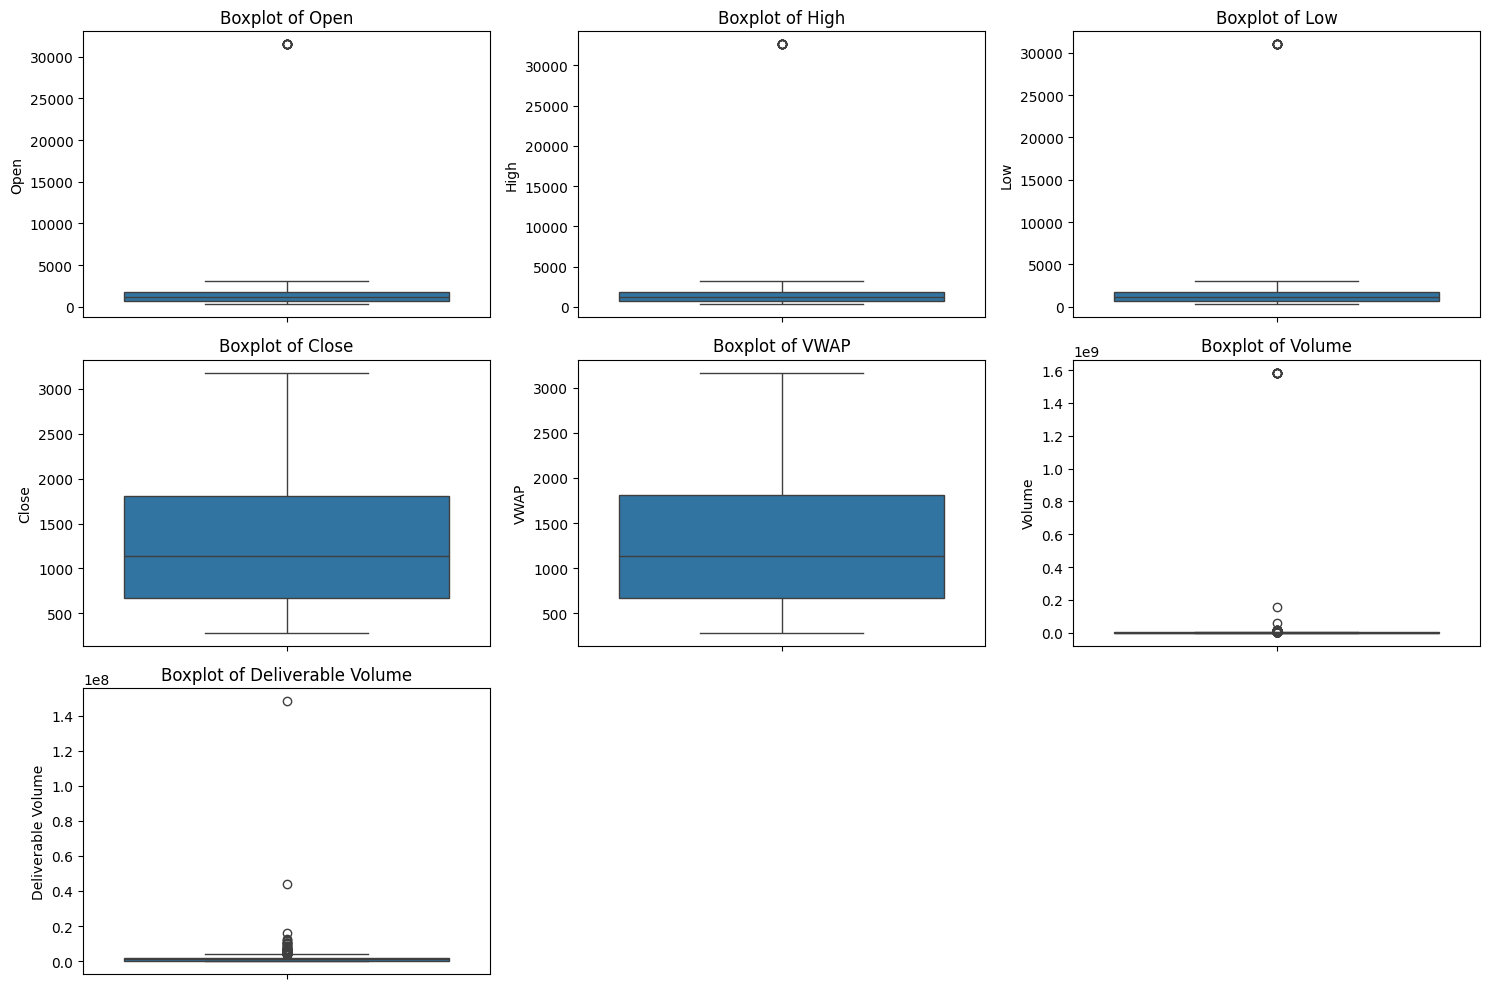

In [238]:
# Calculate the number of rows and columns for subplots
num_cols = len(data.columns[1:])  # Exclude the 'Date' column
num_rows = math.ceil(num_cols / 3)  # Calculate rows needed

# Create boxplots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[1:]):  # Exclude the 'Date' column
    plt.subplot(num_rows, 3, i + 1)  # Use calculated rows and 3 columns
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Interpretation of the Boxplots**
1. `Open`, `High`, and `Low`:<br>
These columns exhibit significant outliers with values far above the whiskers. This indicates unusual spikes or errors in the data (e.g., sudden price changes or incorrect data points).
2. `Close`:<br>
The distribution is relatively balanced. This column seems to have no noise compared to others.
3. `VWAP`:<br>
The Volume Weighted Average Price shows a relatively clean distribution.
4. `Volume`:<br>
There are extreme outliers with unusually high trading volumes. These could be due to sudden market activity or erroneous entries.
5. `Deliverable Volume`:<br>
A similar pattern is observed as in Volume, with extreme outliers in the data.

In [239]:
# IQR Method to Handle Outliers
columns_to_handle = ['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Deliverable Volume']

for col in columns_to_handle:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


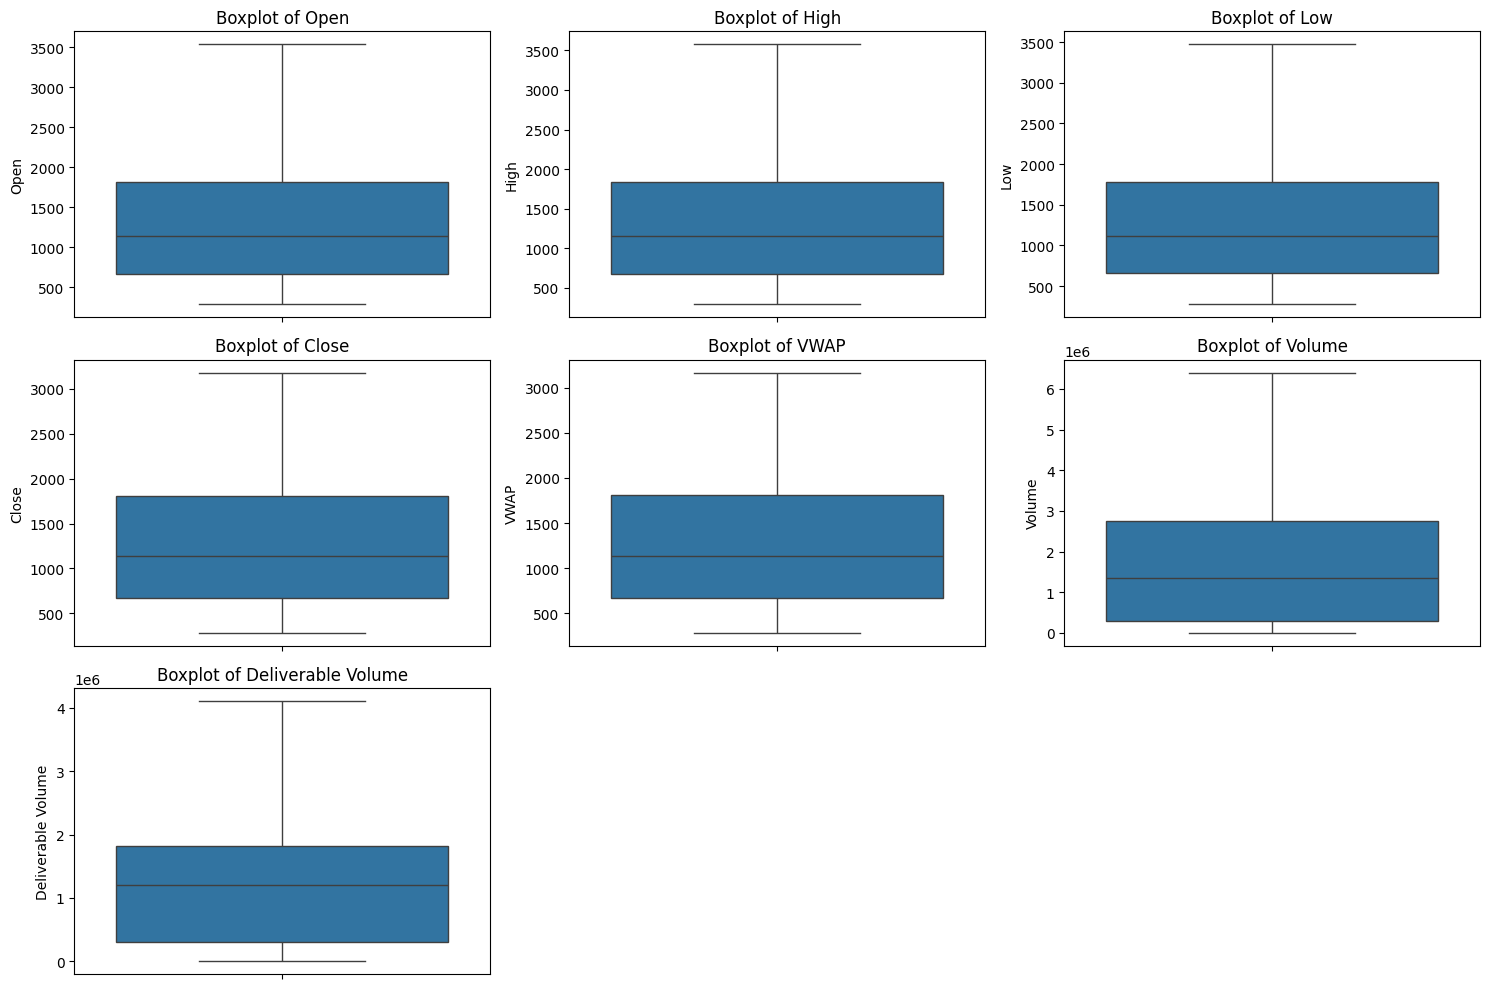

In [240]:
# Create boxplots for each column
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[1:]):  # Exclude the 'Date' column
    plt.subplot(num_rows, 3, i + 1)  # Use calculated rows and 3 columns
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [241]:
# Descriptive Statistics
data.describe()

,Date,Open,High,Low,Close,VWAP,Volume,Deliverable Volume
count,5310,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03,5.310000e+03
mean,2010-08-19 11:48:20.338983168,1288.402283,1308.140363,1267.218378,1283.919633,1283.511160,1.757152e+06,1.254125e+06
min,2000-01-03 00:00:00,284.000000,290.500000,273.250000,283.850000,283.600000,2.919000e+03,1.786000e+03
25%,2005-04-13 12:00:00,669.800000,677.687500,660.000000,668.662500,668.265000,3.048582e+05,3.050868e+05
50%,2010-08-18 12:00:00,1139.500000,1157.300000,1120.050000,1136.675000,1136.720000,1.352933e+06,1.204961e+06
75%,2015-12-20 06:00:00,1816.125000,1836.937500,1785.587500,1811.475000,1810.650000,2.742717e+06,1.827110e+06
max,2021-04-30 00:00:00,3535.612500,3575.812500,3473.968750,3180.150000,3166.580000,6.399506e+06,4.110144e+06
std,NaN,715.490933,727.170463,703.300376,709.312647,708.987194,1.682767e+06,1.049691e+06


**Distribution of these stock price-related variables.**

**Histogram of Close Price:**

This will help check if the Close price follows a normal distribution or is skewed.

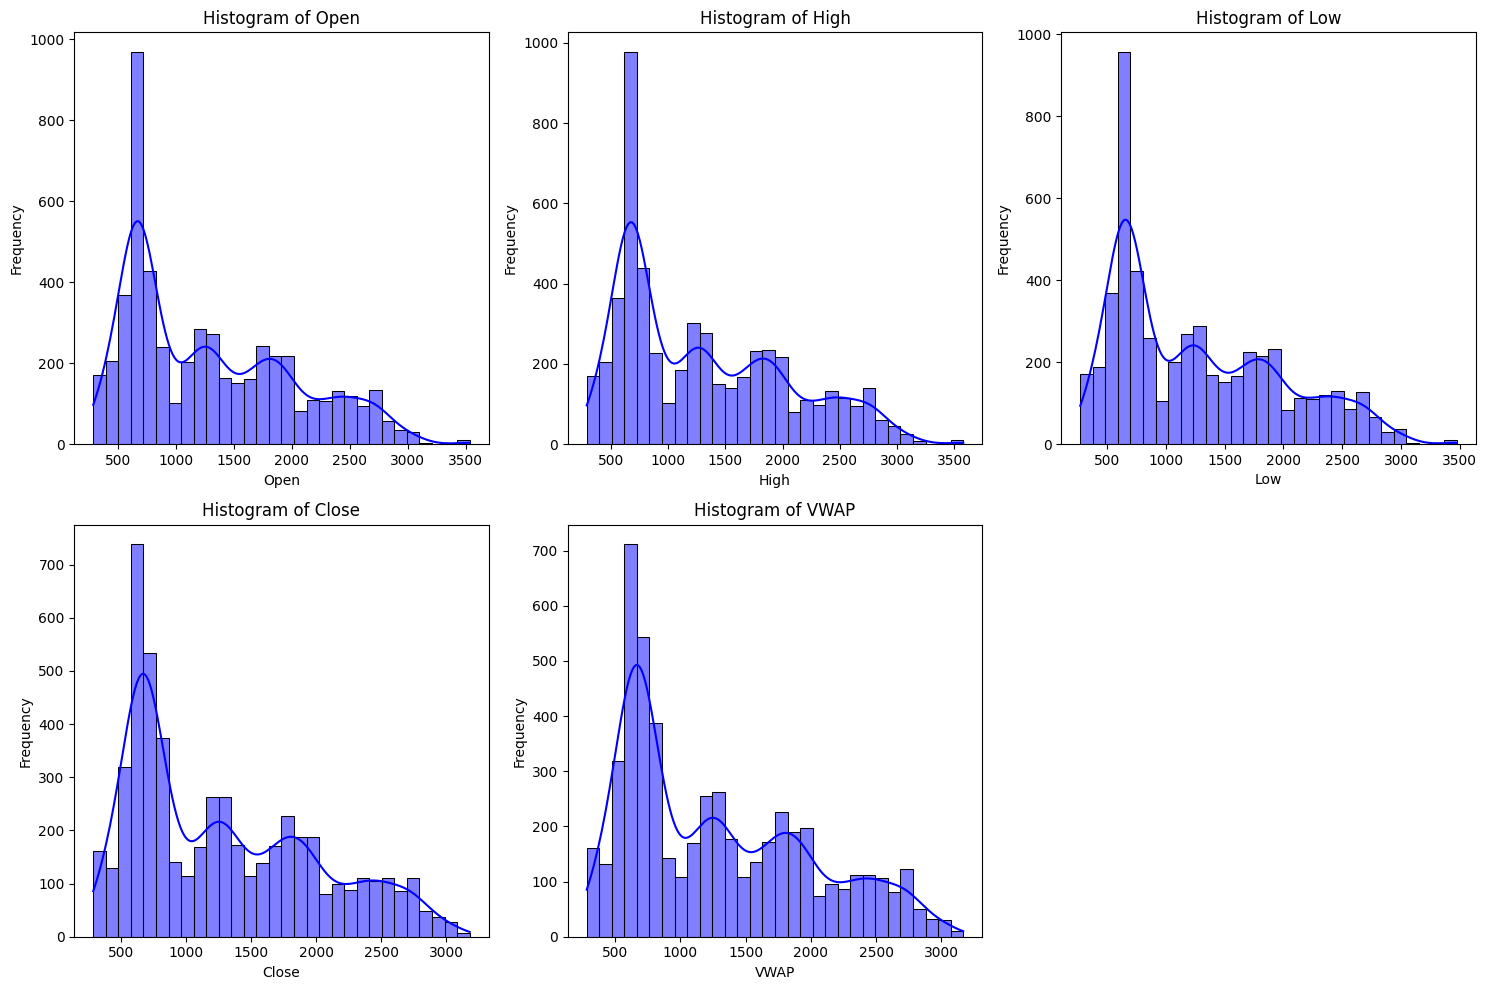

In [242]:
# List of the relevant columns
cols = ['Open', 'High', 'Low', 'Close', 'VWAP']

# Plotting histograms for Open, High, Low, Close, and VWAP
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, position i
    sns.histplot(data[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Key Findings from Histograms:**

1. **Right Skewness**: The right skewness in all histograms indicates that there are more days with lower prices compared to higher prices. This could be due to various factors like market sentiment, economic conditions, or specific events affecting the stock.
2. **Moderate Spread:** The moderate spread in all histograms suggests that there is some variability in the prices, but the range is not extremely wide.
3. **Similar Central Tendency:** The central tendency for all price-related variables (Open, High, Low, Close, VWAP) is around the 500-1000 range, indicating that the stock generally trades within this price range.

With `Date` as the index, you can use the following code to plot the trend of the `Open`, `Close`, `High`, `Low`, and `VWAP` prices over time:

In [243]:
# Ensure the 'Date' column is datetime type
data.index = pd.to_datetime(data.index)

# Sort the data by the Date index (if not already sorted)
data.sort_index(inplace=True)

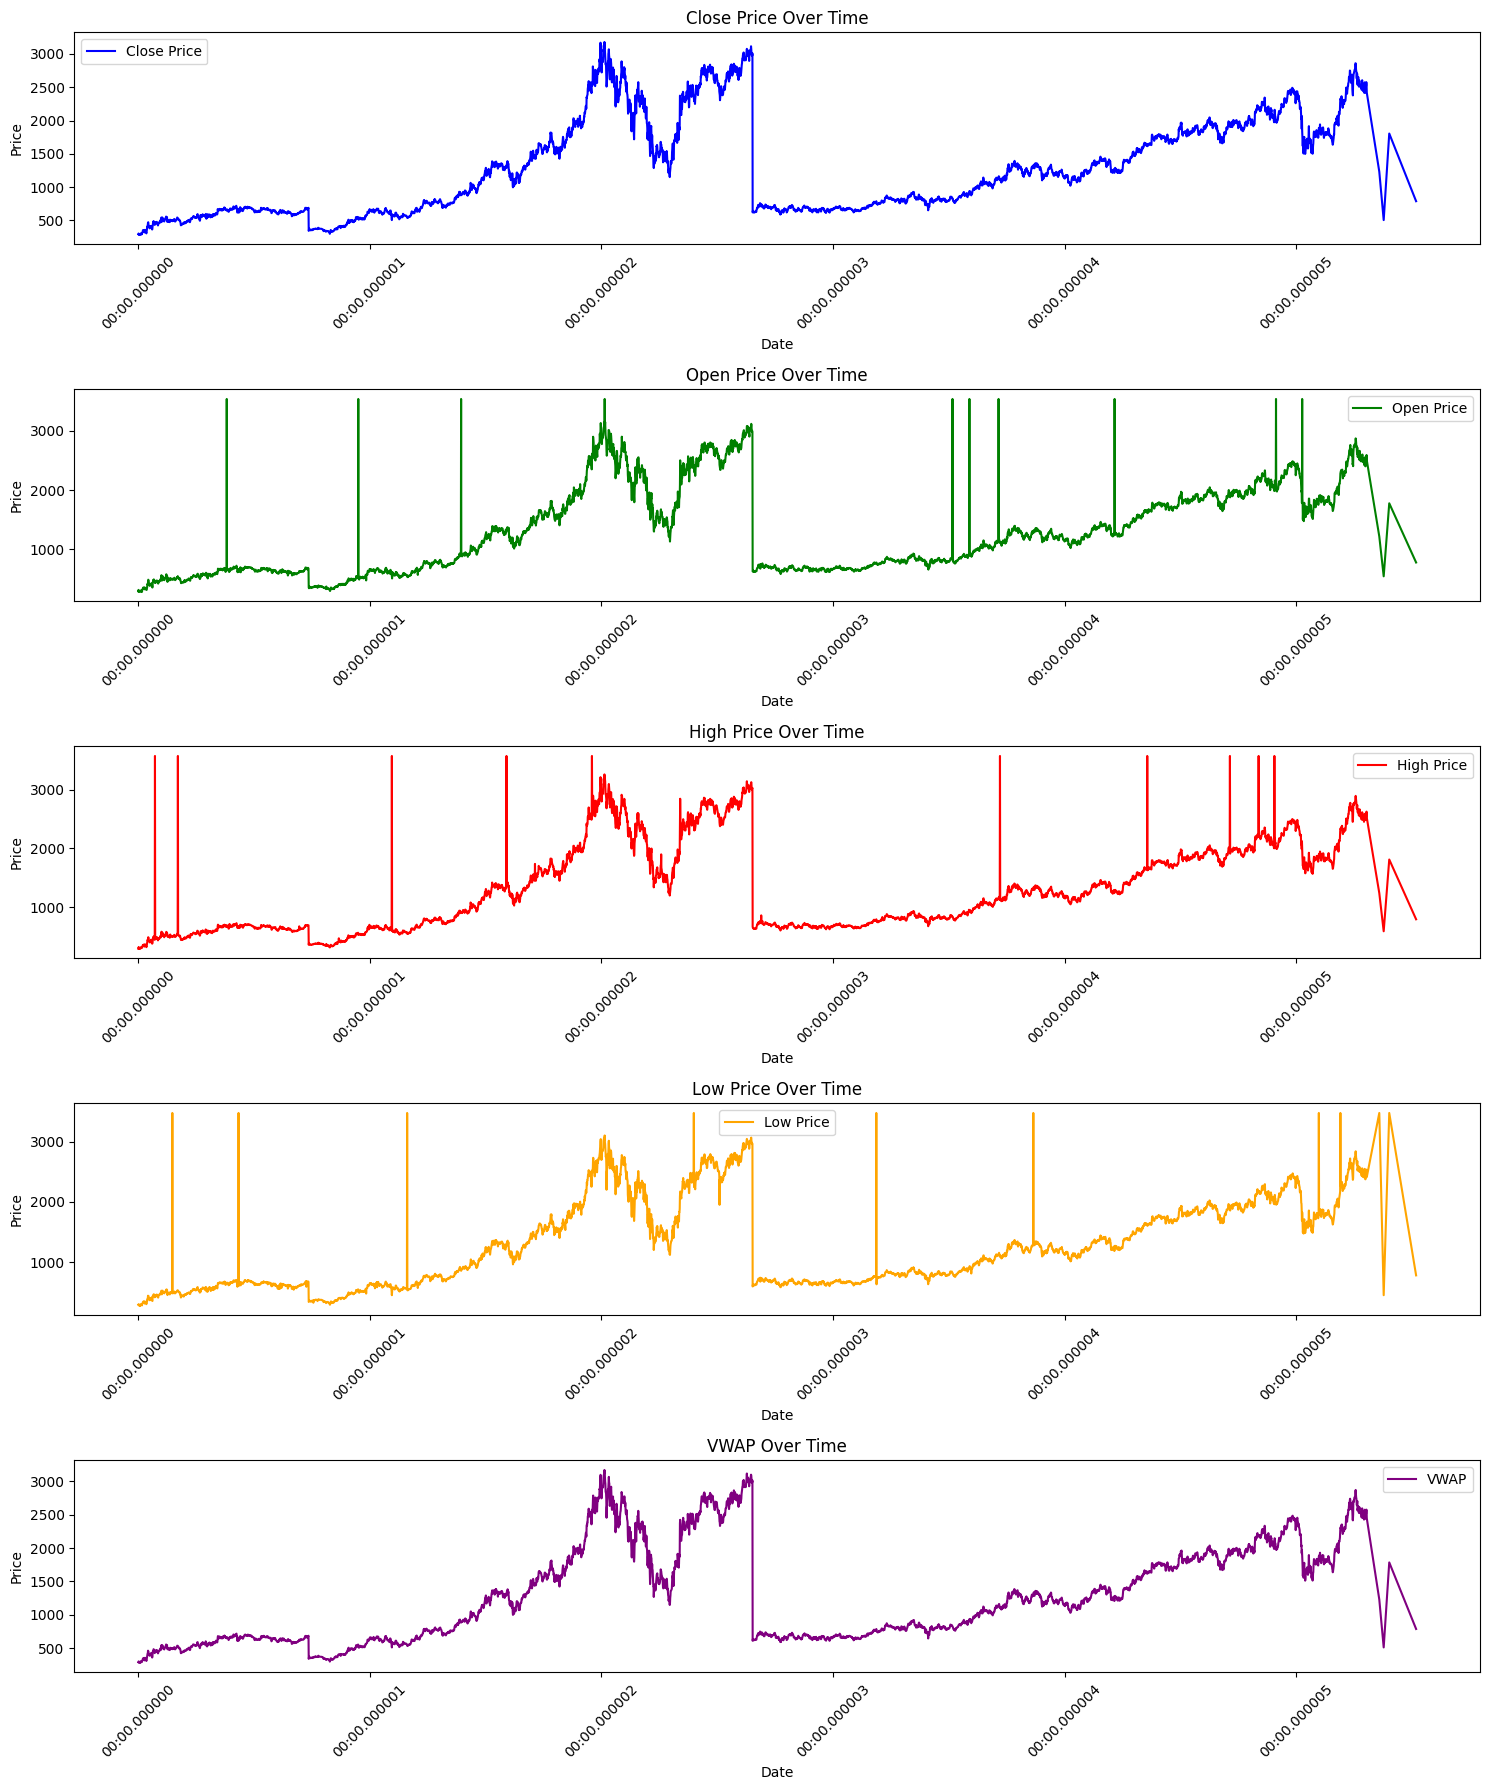

In [244]:
# Create subplots with 5 rows and 1 column (one for each variable)
fig, axs = plt.subplots(5, 1, figsize=(15, 18))

# Plot each series in its corresponding subplot
axs[0].plot(data.index, data['Close'], label='Close Price', color='blue')
axs[0].set_title('Close Price Over Time')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(data.index, data['Open'], label='Open Price', color='green')
axs[1].set_title('Open Price Over Time')
axs[1].set_ylabel('Price')
axs[1].legend()

axs[2].plot(data.index, data['High'], label='High Price', color='red')
axs[2].set_title('High Price Over Time')
axs[2].set_ylabel('Price')
axs[2].legend()

axs[3].plot(data.index, data['Low'], label='Low Price', color='orange')
axs[3].set_title('Low Price Over Time')
axs[3].set_ylabel('Price')
axs[3].legend()

axs[4].plot(data.index, data['VWAP'], label='VWAP', color='purple')
axs[4].set_title('VWAP Over Time')
axs[4].set_ylabel('Price')
axs[4].legend()

# Rotate date labels for better readability
for ax in axs:
    ax.set_xlabel('Date')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

**Key Findings from the above Time series plots:**

1. **Close Price:**<br>**Trend:** The Close price is typically the most important line since it represents the final price of the stock for the day. This graph will show the overall market trend.<br>**Bullish/Bearish Market:** A general upward (bullish) or downward (bearish) trend indicates whether the market was thriving or struggling.<br>**Volatility:** Large fluctuations or sharp peaks/troughs might indicate market events or shocks (e.g., financial crises, company announcements).<br>**Period of Stability:** If the close price stays relatively flat for a long period, it suggests market stability or no major news affecting the stock.
2. **Open Price:**<br>**Trend:** The Open price reflects the price at which the stock opens for trading on a given day. It often shows the sentiment at market open, which can be influenced by after-market news or events.<br>**Opening Gap:** A large gap between the Open and Close prices can indicate strong market reactions to news or earnings reports released after market hours.<br>**Daily Fluctuations:** Comparing the Open to the Close within a day can help assess intra-day volatility or trends.<br>**Market Sentiment at Open:** If the Open price is consistently higher or lower than the Close, it can indicate that investors are either optimistic or pessimistic about the stock at the start of the trading day.
3. **High Price:**<br>**Trend:** The High price shows the highest price reached during a given day of trading. This line will typically track the upper range of the price movement.<br>**Intraday Price Action:** The High often reaches its peak early in the day or late, depending on buying/selling pressure.<br>**Resistance Levels:** If the High frequently hits a certain level without breaking it, this can suggest a resistance level for the stock price.<br>**Volatility:** Large daily fluctuations in the High may indicate high market volatility or speculative trading.
4. **Low Price:**<br>**Trend:** The Low price represents the lowest point at which the stock trades during the day. It complements the High price.<br>**Support Levels:** If the Low price consistently hits a certain level but doesn’t go below it, this can indicate a support level for the stock.<br>**Price Declines:** Sharp declines in the Low price may indicate a market downturn, panic selling, or negative news affecting the stock.<br>**Price Recovery:** If the Low price drops and then quickly recovers, it could signal investor confidence returning to the stock.
5. **VWAP (Volume-Weighted Average Price):**<br>**Trend:** The VWAP represents the average price a stock has traded at throughout the day, weighted by volume. It helps investors understand the price at which most trading occurred and is often used as a benchmark for institutional trading.<br>**Trading Benchmark:** If the price is above or below the VWAP, it could indicate whether the stock is being bought or sold in high volume.<br>**Market Sentiment:** When the price is consistently above the VWAP, it suggests bullish sentiment, and when below, it suggests bearish sentiment.<br>**Volume Insights:** Major price movements above or below the VWAP can show investor activity and whether the stock is in a strong trend or consolidation phase.


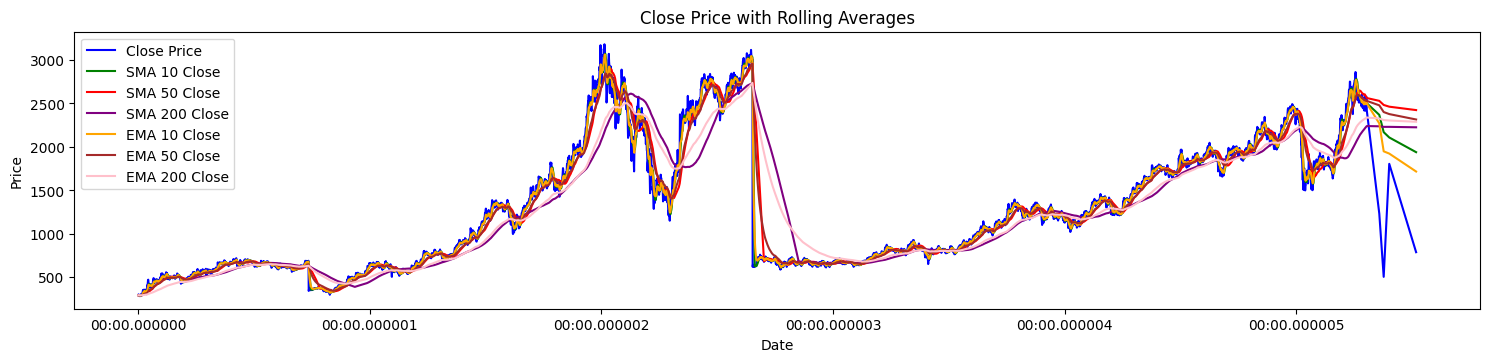

In [245]:
# Define the rolling window sizes for short, medium, and long-term averages
short_window = 10   # 10 days for short-term
medium_window = 50  # 50 days for medium-term
long_window = 200   # 200 days for long-term

# Calculate the Simple Moving Averages (SMA)
data['SMA_Close_short'] = data['Close'].rolling(window=short_window).mean()
data['SMA_Close_medium'] = data['Close'].rolling(window=medium_window).mean()
data['SMA_Close_long'] = data['Close'].rolling(window=long_window).mean()

# Calculate the Exponential Moving Averages (EMA)
data['EMA_Close_short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['EMA_Close_medium'] = data['Close'].ewm(span=medium_window, adjust=False).mean()
data['EMA_Close_long'] = data['Close'].ewm(span=long_window, adjust=False).mean()

# Plotting the Rolling Averages
plt.figure(figsize=(15, 10))

# Close Price with Rolling Averages
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_Close_short'], label=f'SMA {short_window} Close', color='green')
plt.plot(data.index, data['SMA_Close_medium'], label=f'SMA {medium_window} Close', color='red')
plt.plot(data.index, data['SMA_Close_long'], label=f'SMA {long_window} Close', color='purple')
plt.plot(data.index, data['EMA_Close_short'], label=f'EMA {short_window} Close', color='orange')
plt.plot(data.index, data['EMA_Close_medium'], label=f'EMA {medium_window} Close', color='brown')
plt.plot(data.index, data['EMA_Close_long'], label=f'EMA {long_window} Close', color='pink')
plt.title('Close Price with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


1. General Price Trend:<br>
The stock price shows a long-term upward trend, with periods of significant volatility and corrections, particularly around 2008 (financial crisis) and 2020 (pandemic-induced market crash).<br>
2. Short-Term vs Long-Term Trends:<br>
Short-term moving averages (SMA/EMA 10) are more reactive to price changes, while longer-term moving averages (SMA/EMA 200) provide smoother trends, confirming sustained price movements.<br>
Crossovers between these averages signal potential trend changes.<br>
3. Bullish Signals:<br>
When shorter-term averages (SMA/EMA 10 or 50) cross above longer-term averages (SMA/EMA 200), it indicates the beginning of an uptrend.<br>
Notable bullish crossovers can be seen before major price rallies.<br>
4. Bearish Signals:<br>
Short-term averages crossing below long-term averages (e.g., SMA/EMA 200) mark downtrends or corrections.<br>
Significant bearish crossovers occur during the 2008 crisis and 2020 market crash.<br>
5. Volatility Patterns:<br>
Periods of sharp price swings (e.g., 2008 and 2020) result in wider gaps between the price line and moving averages.<br>
Consolidation phases have moving averages converging, showing reduced volatility.<br>
6. Long-Term Growth:<br>
Despite corrections, the long-term SMA/EMA 200 trends upward, indicating consistent growth over the years.<br>
This suggests that the stock or index has a robust underlying performance.

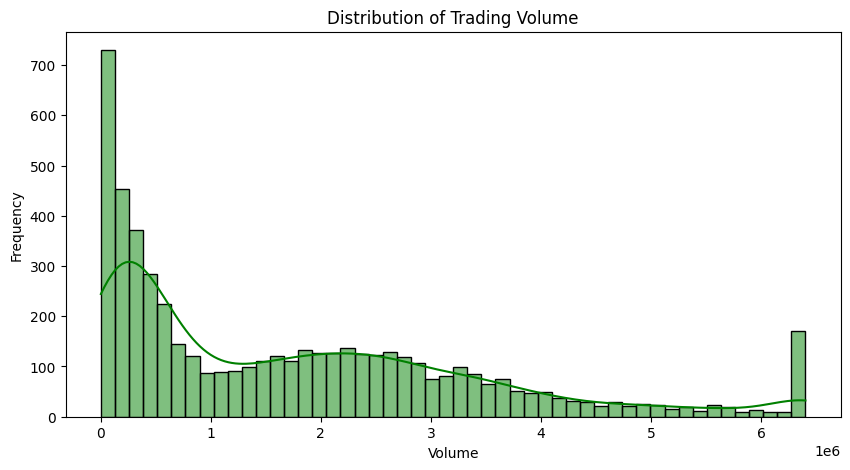

In [246]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Volume'], kde=True, bins=50, color='green')
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()


1. The trading volume distribution is right-skewed, indicating that low trading volumes are more frequent, while high volumes occur less often.
2. A significant spike is observed at the higher end (around 6 x 10\^6), suggesting unusually high trading activity, likely driven by specific events.
3. The majority of trading days have relatively low volumes, reflecting typical market activity during normal conditions.
4. The frequency of occurrences gradually declines as trading volume increases, showing an exponential-like decay.

## Bivariant Analysis

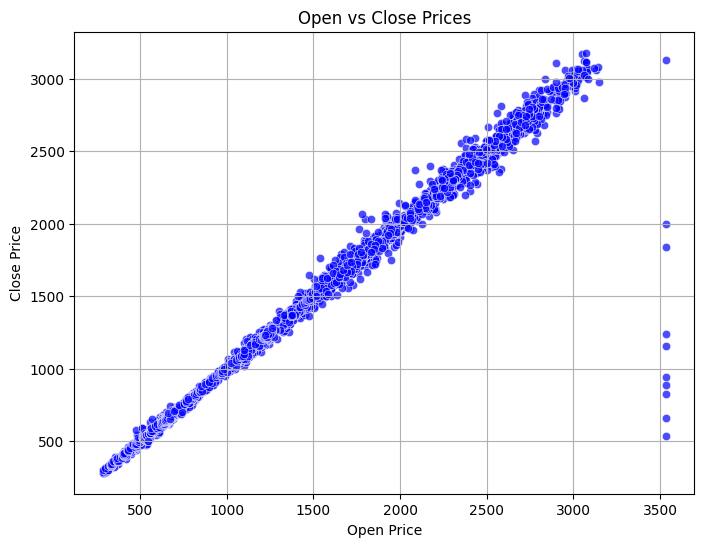

In [247]:
# Open vs Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Open'], y=data['Close'], color='blue', alpha=0.7)
plt.title("Open vs Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

The scatter plot shows a strong positive correlation between the open price and the close price of the stock. This indicates that the stock's opening price is a good predictor of its closing price. The points are clustered around a line with a positive slope, suggesting that as the open price increases, the close price also tends to increase.

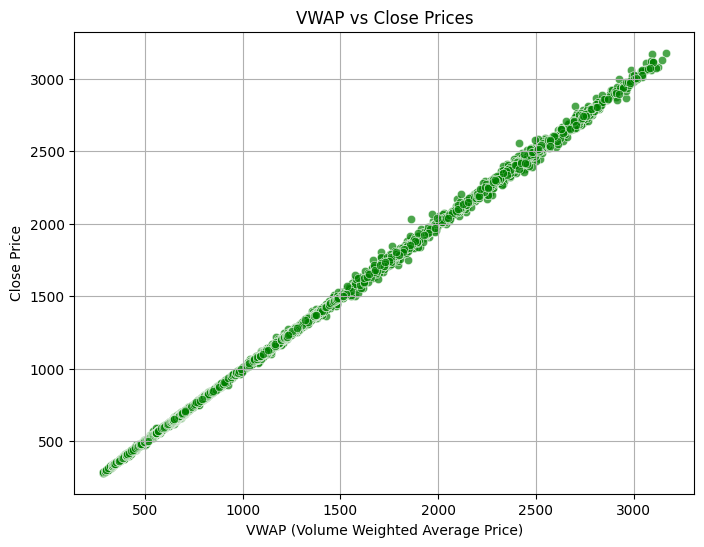

In [248]:
# VWAP vs Close
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['VWAP'], y=data['Close'], color='green', alpha=0.7)
plt.title("VWAP vs Close Prices")
plt.xlabel("VWAP (Volume Weighted Average Price)")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

The scatter plot shows a strong positive correlation between the VWAP (Volume Weighted Average Price) and the close price of the stock. This indicates that the VWAP is a good predictor of the closing price. As the VWAP increases, the close price also tends to increase. This suggests that the average price of the stock, weighted by volume, is a good indicator of its closing price.

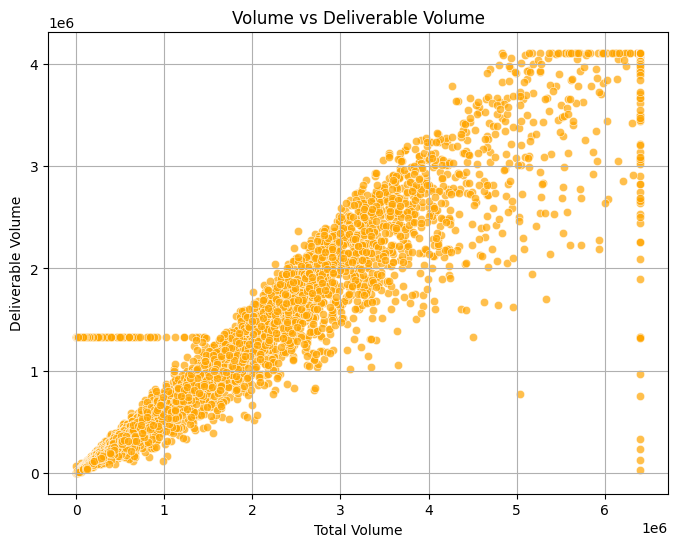

In [249]:
# Volume vs Deliverable Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Volume'], y=data['Deliverable Volume'], color='orange', alpha=0.7)
plt.title("Volume vs Deliverable Volume")
plt.xlabel("Total Volume")
plt.ylabel("Deliverable Volume")
plt.grid(True)
plt.show()

The scatter plot shows a strong positive correlation between the total volume and the deliverable volume of the stock. This indicates that as the total volume of shares traded increases, the volume of shares actually delivered to buyers also tends to increase. However, there is a significant number of data points where the deliverable volume is much lower than the total volume. This suggests that a portion of the traded shares might not be physically delivered, which could be due to various reasons like short selling, intraday trading, or other market practices.

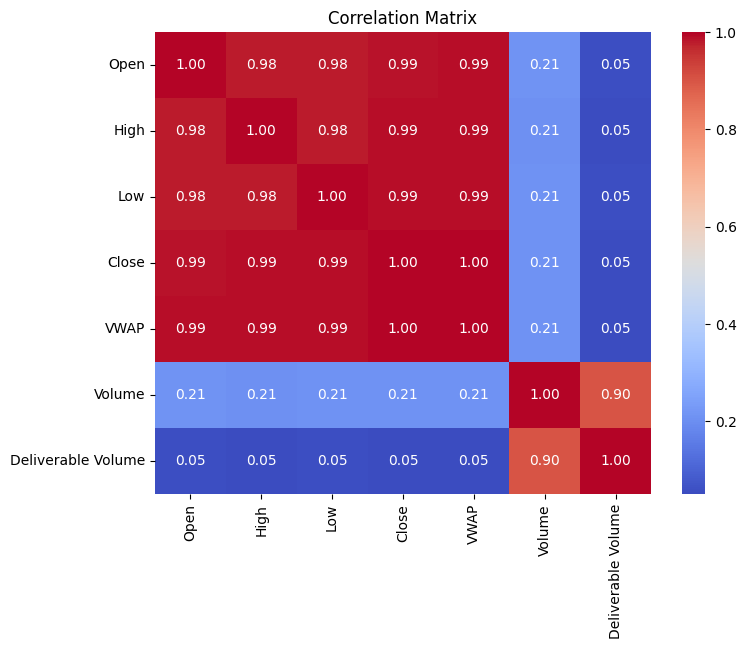

In [250]:
# Correlation Matrix
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Deliverable Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix reveals several key insights:

1. High Correlation among Price Variables: The price variables (Open, High, Low, Close, VWAP) are highly correlated with each other, indicating that they tend to move in the same direction. This is expected as these variables are related to the same underlying stock price.

2. Weak Correlation with Volume: The price variables have a weak correlation with the volume and deliverable volume. This suggests that changes in trading volume do not necessarily have a strong impact on the stock price.

3. Strong Correlation between Volume and Deliverable Volume: The volume and deliverable volume are highly correlated, indicating that a large portion of the traded shares are actually delivered to buyers.

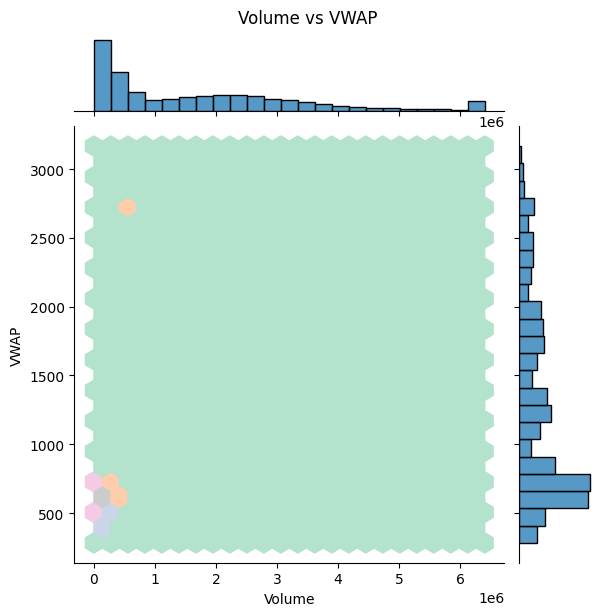

In [251]:
# Joint Plot
sns.jointplot(x=data['Volume'], y=data['VWAP'], kind='hex', cmap='Pastel2')
plt.suptitle("Volume vs VWAP", y=1.02)
plt.xlabel("Volume")
plt.ylabel("VWAP")
plt.show()

1. Clustered at low values: Most data points have low trading volumes and VWAP (<500).
2. Right-skewed volume: High volumes are rare, with most activity concentrated at smaller volumes.
3. VWAP range: Majority of VWAP values are below 1000.
4. Sparse high-volume activity: Few instances of high trading volumes with high VWAP values.
5. No clear linear relationship: Volume and VWAP don’t show a strong correlation.

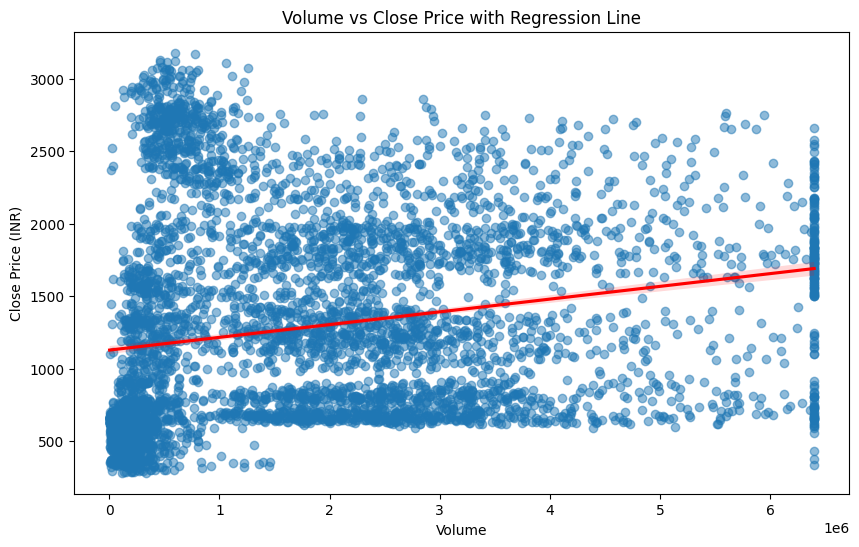

In [252]:
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Volume', y='Close', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Volume vs Close Price with Regression Line')
plt.xlabel('Volume')
plt.ylabel('Close Price (INR)')
plt.show()


The scatter plot with a regression line shows a weak positive correlation between volume and the closing price of the stock. This indicates that as the trading volume increases, the closing price tends to increase slightly, but the relationship is not very strong. The regression line has a positive slope, but it is relatively flat, suggesting that the impact of volume on the closing price is limited.

### Multivariant Analysis

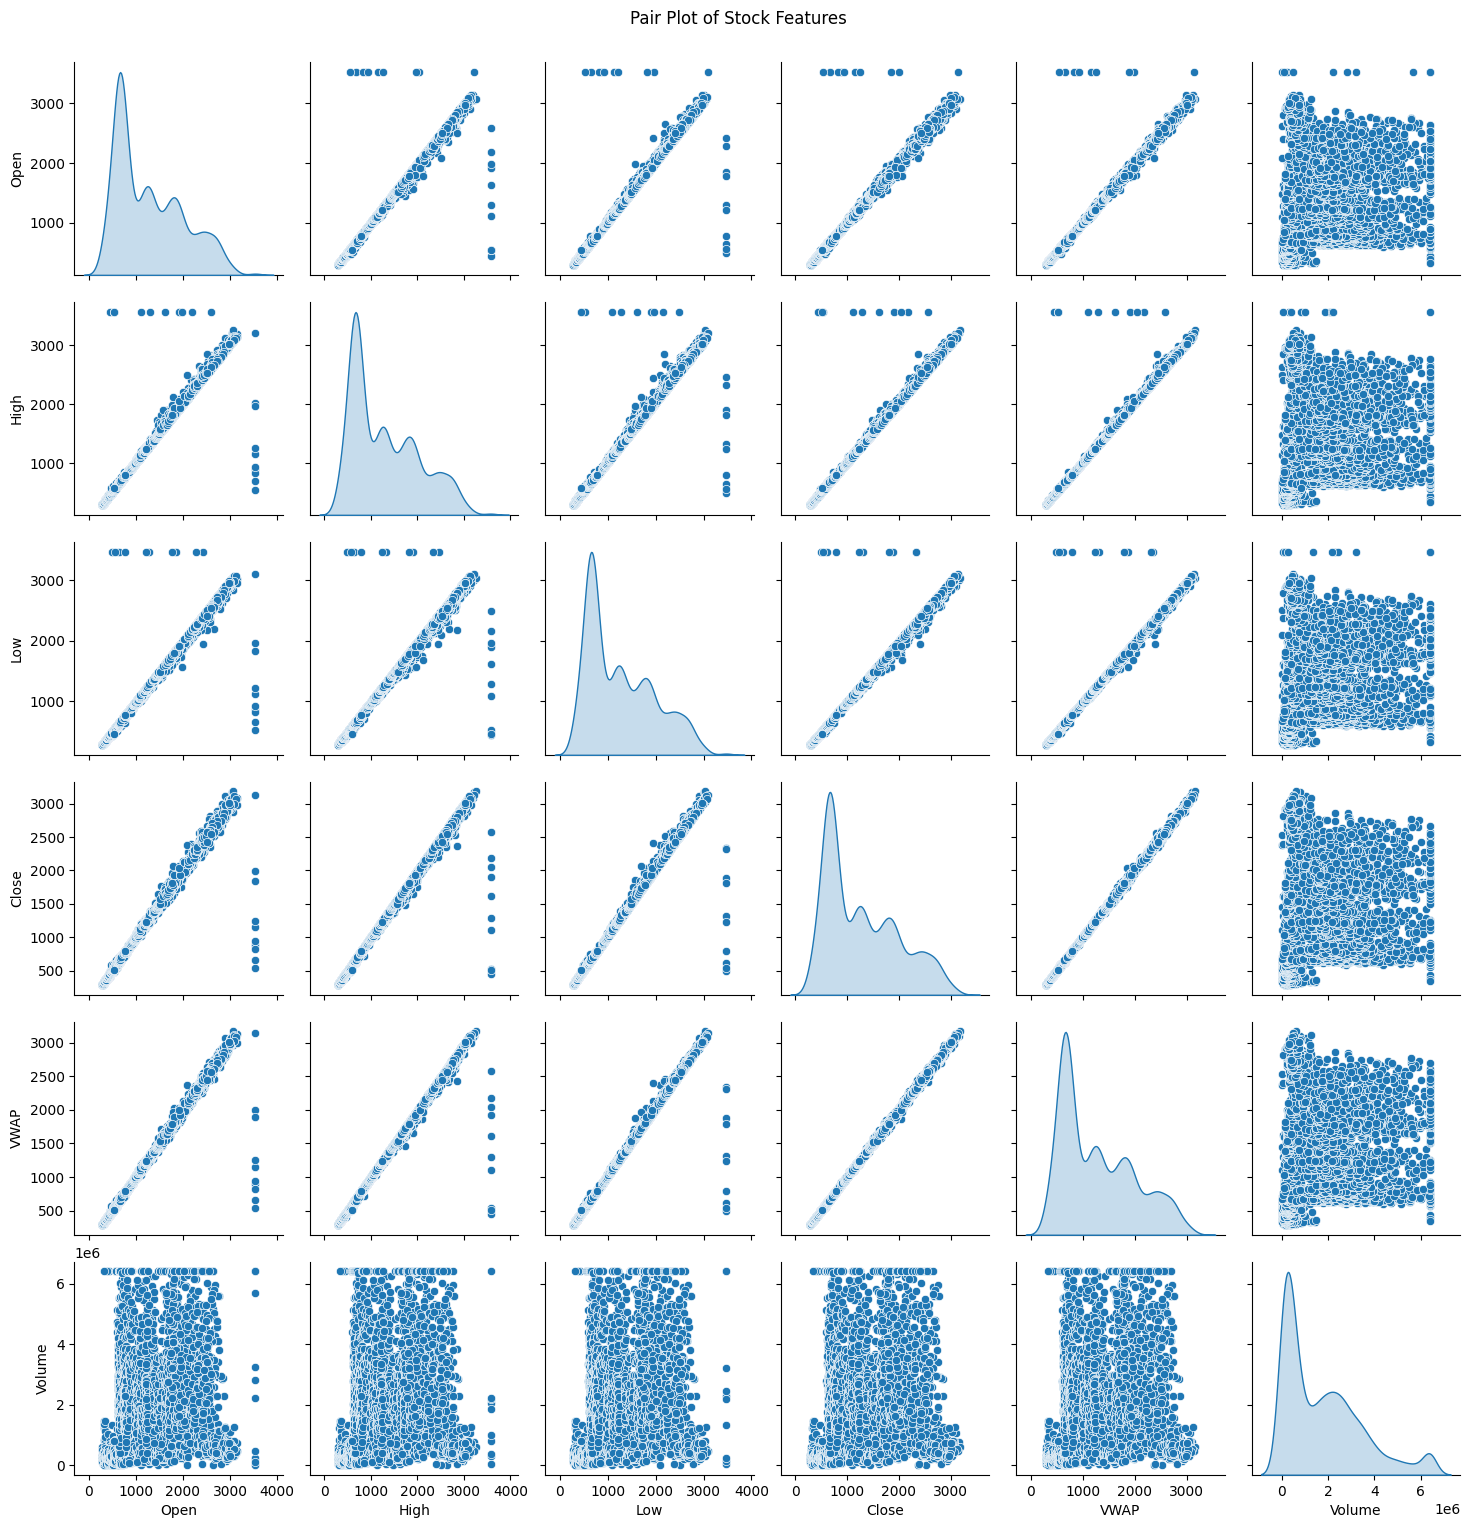

In [253]:
# Pair Plot
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume']], diag_kind='kde')
plt.suptitle("Pair Plot of Stock Features", y=1.02)
plt.show()

The pair plot provides a comprehensive view of the relationships between different stock features. Here are the key findings:

1. Strong Positive Correlation among Price Variables:<br>
The price variables (Open, High, Low, Close, VWAP) are highly correlated with each other.
This indicates that these variables tend to move in the same direction.
2. Weak Correlation with Volume:<br>
The price variables have a weak correlation with the volume.
This suggests that changes in trading volume do not significantly impact the stock price.
3. Volume and Deliverable Volume:<br>
The volume and deliverable volume are highly correlated, indicating that a large portion of the traded shares are actually delivered to buyers.
4. Outliers:<br>
There are some outliers in the data, especially in the volume and deliverable volume variables. These outliers might represent unusual trading days with very high volume or other anomalies.

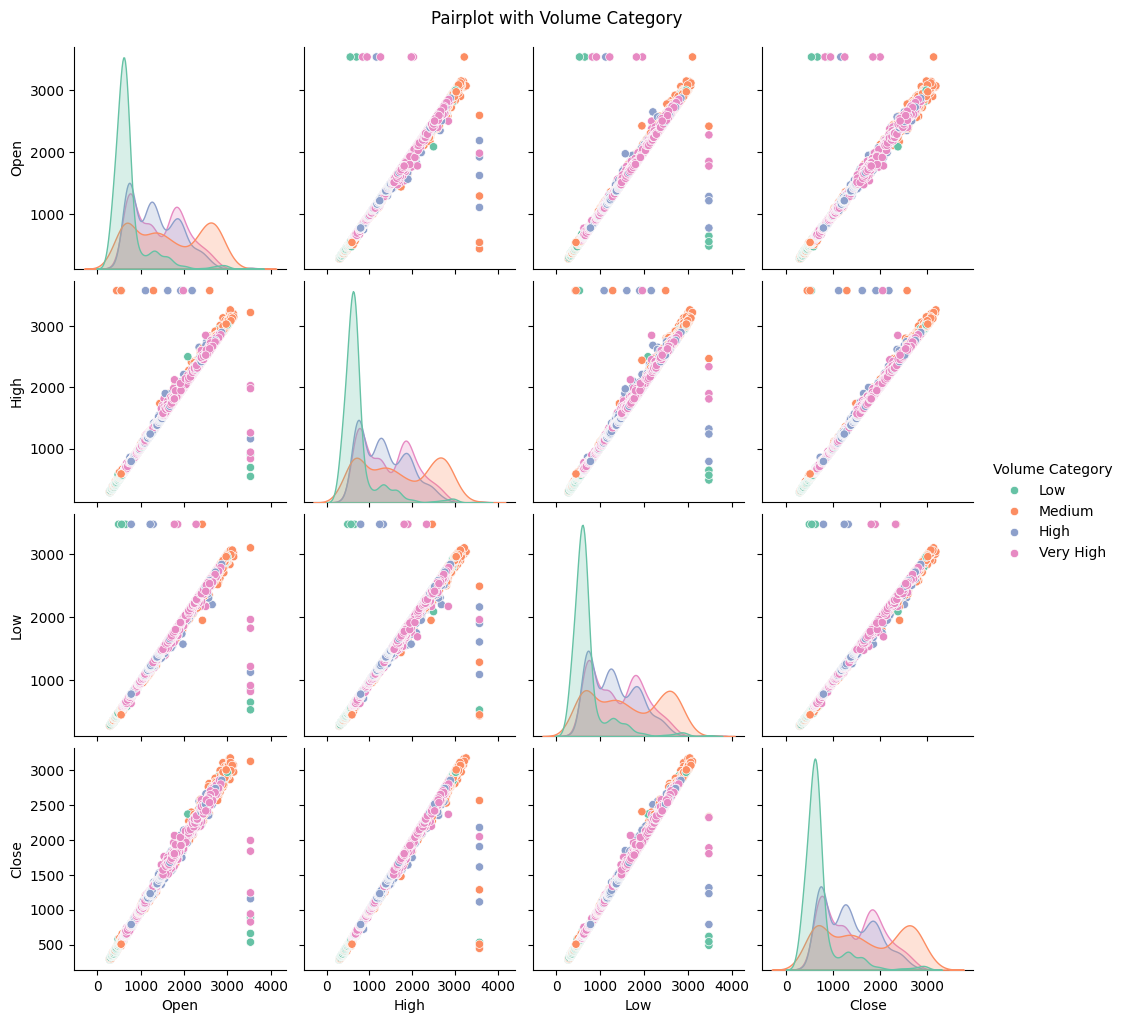

In [254]:
# Categorize Volume into quartiles
data['Volume Category'] = pd.qcut(data['Volume'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

sns.pairplot(
    data[['Open', 'High', 'Low', 'Close', 'Volume Category']],
    hue='Volume Category',
    diag_kind='kde',
    palette='Set2'
)
plt.suptitle('Pairplot with Volume Category', y=1.02)
plt.show()


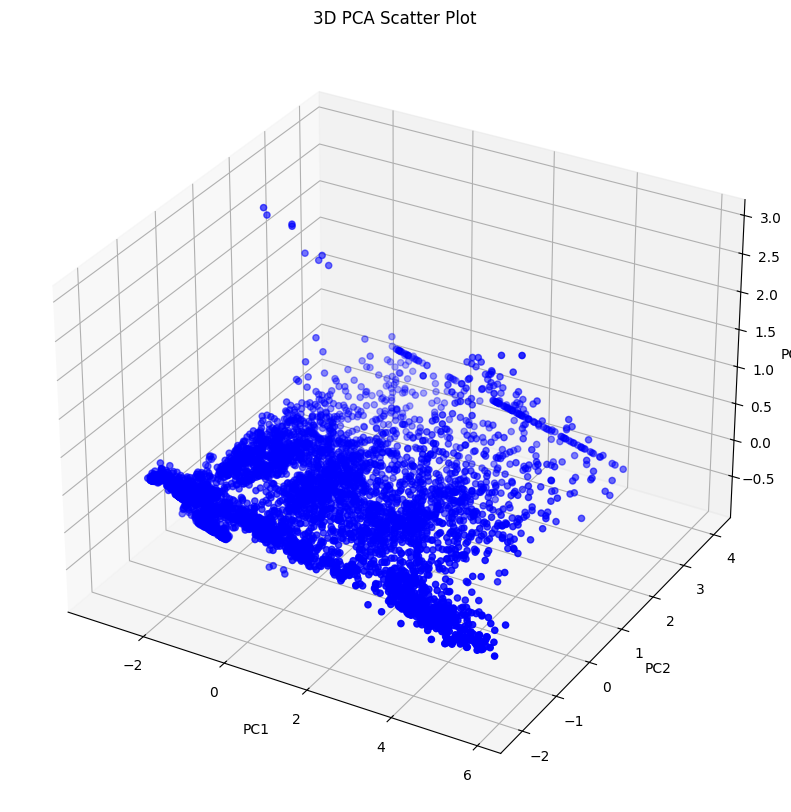

In [255]:
# Principal Component Analysis (PCA)
# Scaling the data for PCA
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data[['Open', 'High', 'Low', 'Close', 'VWAP', 'Volume', 'Deliverable Volume']])

# Importing PCA
from sklearn.decomposition import PCA # Importing PCA class

# Applying PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the Principal Components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# 3D Scatter Plot for the first three principal components
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot')
plt.show()

The 3D PCA scatter plot reveals that the data points cluster in specific regions, indicating underlying patterns. The data is spread along certain directions, highlighting variations. A few outliers are present, which might warrant further investigation. The first two principal components (PC1 and PC2) capture most of the data's variance.

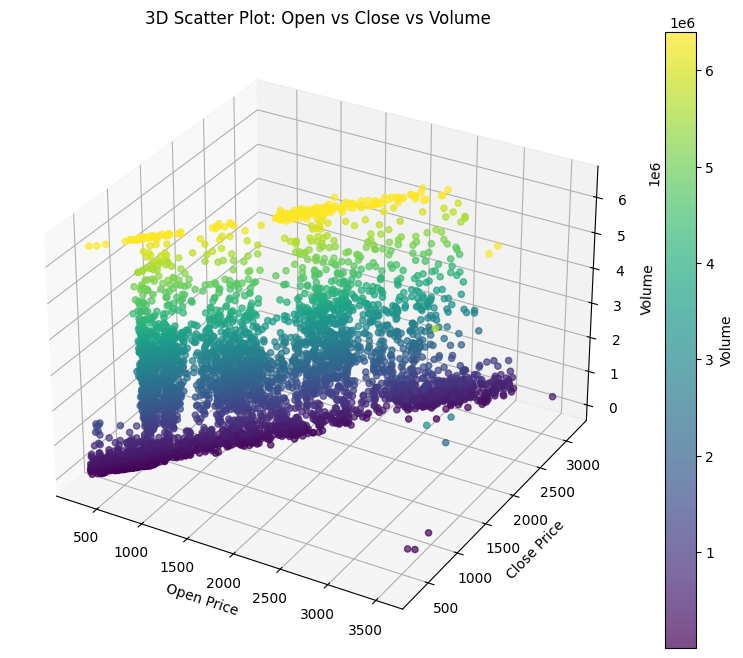

In [256]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Open'], data['Close'], data['Volume'], # Use data['Volume'] for z-coordinates
    c=data['Volume'], cmap='viridis', alpha=0.7  # Use data['Volume'] for color mapping
)

ax.set_title('3D Scatter Plot: Open vs Close vs Volume')
ax.set_xlabel('Open Price')
ax.set_ylabel('Close Price')
ax.set_zlabel('Volume')
fig.colorbar(scatter, label='Volume')
plt.show()

The plot shows a positive correlation between Open and Close prices. Volume is weakly correlated with price. Most data points are in the low-volume range. A few outliers are present in the high-volume range.

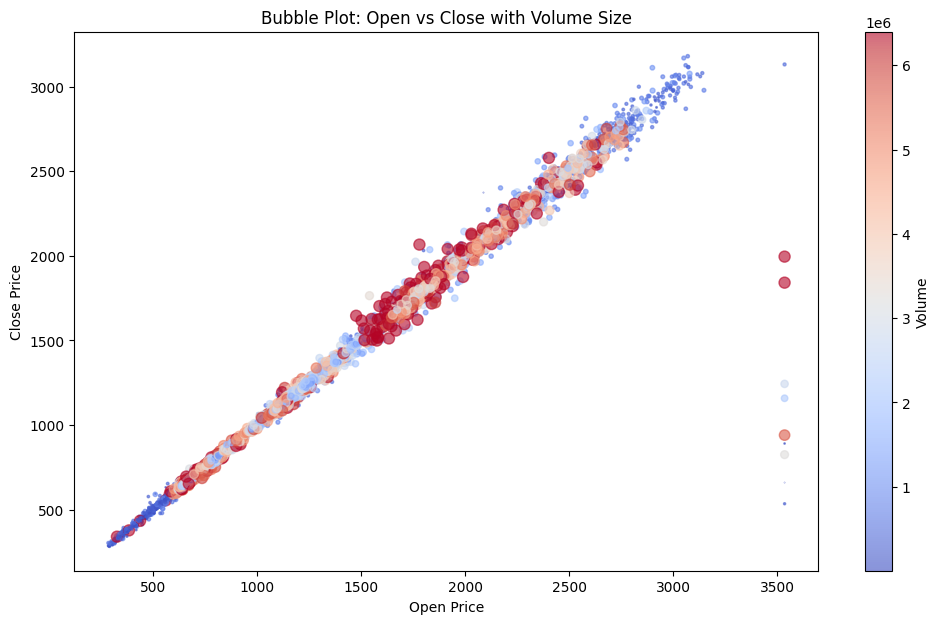

In [257]:
plt.figure(figsize=(12, 7))
bubble_size = data['Volume'] / 1e5  # Scale bubble size
plt.scatter(data['Open'], data['Close'], s=bubble_size, alpha=0.6, c=data['Volume'], cmap='coolwarm')
plt.colorbar(label='Volume')
plt.title('Bubble Plot: Open vs Close with Volume Size')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


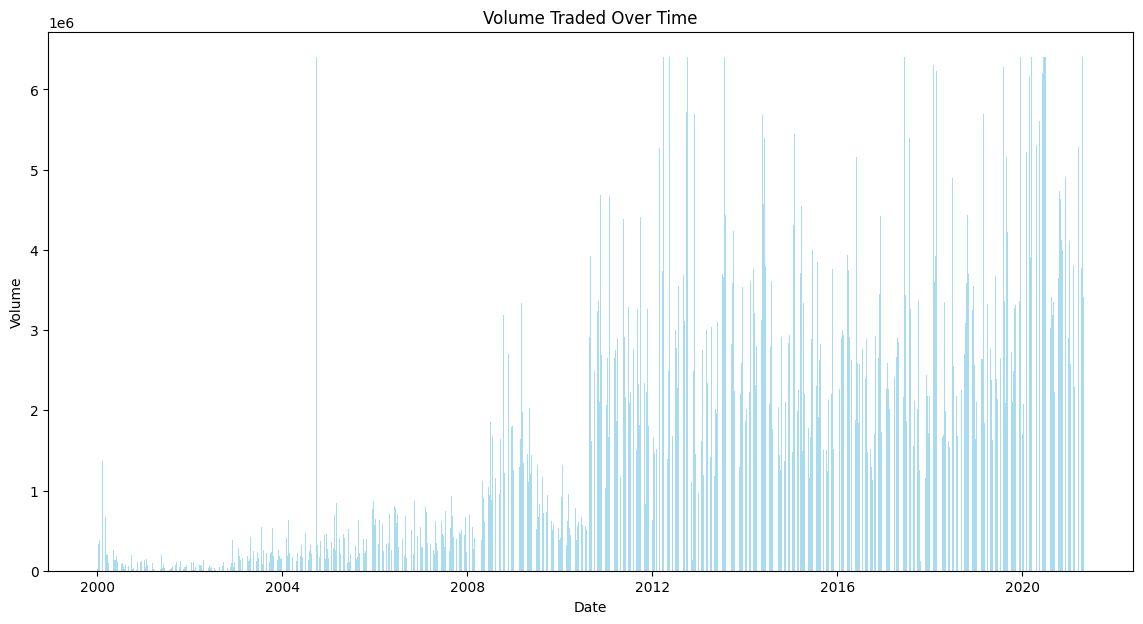

In [258]:
plt.figure(figsize=(14, 7))
plt.bar(data['Date'], data['Volume'], color='skyblue', alpha=0.7)
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


In [259]:
# Data Preparation for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = data[['Close']].values
scaled_close_prices = scaler.fit_transform(close_prices)

In [260]:
# Create sequences
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])  # Sequence of 'sequence_length' days
        y.append(data[i, 0])  # Target value
    return np.array(X), np.array(y)

In [261]:
sequence_length = 60
X, y = create_sequences(scaled_close_prices, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [262]:
# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [263]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 0.0137 - val_loss: 0.0018
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 9/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0012 - val_loss: 9.9400e-04
Epoch 10/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0010 - val_loss: 9.4697e-04
Epoch 11/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.0011 - val_loss: 9.1859e-04
Epoch 12/20
132/132 ━━━━

In [264]:
# Predict and Rescale
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


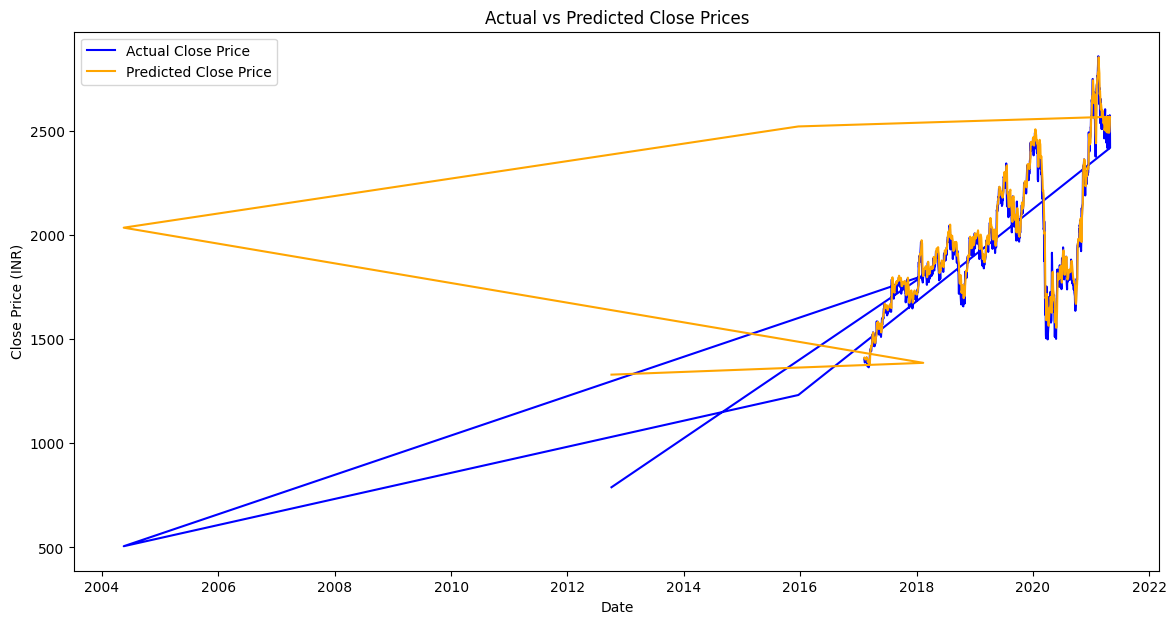

In [265]:
# Visualization of Predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Close Price', color='blue')
plt.plot(data['Date'][-len(y_test):], predictions, label='Predicted Close Price', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()

* ** Initial Underprediction:** <br>In the early years, the predicted close price is significantly lower than the actual close price. This indicates that the model was underestimating the stock's potential at that time.
* **Improved Prediction Accuracy:** <br>As time progresses, the predicted close price becomes closer to the actual close price. This suggests that the model's accuracy has improved over time.
* **Periods of Overprediction and Underprediction:** <br>There are periods where the predicted price is higher or lower than the actual price. This indicates that the model's accuracy fluctuates over time, potentially due to changing market conditions or model limitations.

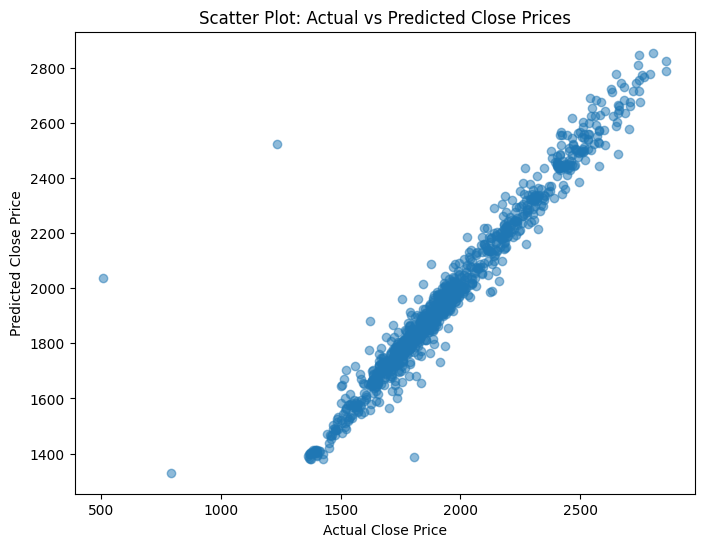

In [271]:
# Scatter Plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions, alpha=0.5)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Scatter Plot: Actual vs Predicted Close Prices')
plt.show()

The scatter plot shows a strong positive correlation between the actual close price and the predicted close price. This indicates that the model is generally able to accurately predict the stock's closing price. The points are clustered along a diagonal line, suggesting that the model's predictions are close to the actual values. However, there are a few outliers, which might represent instances where the model's predictions were less accurate. Overall, the plot suggests that the model is performing well in predicting the stock's closing price.

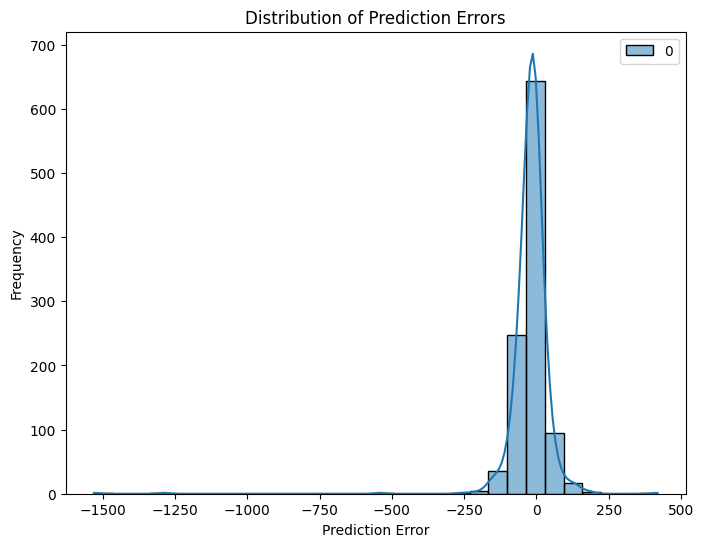

In [268]:
# Error Distribution
prediction_errors = scaler.inverse_transform(y_test.reshape(-1, 1)) - predictions
plt.figure(figsize=(8, 6))
sns.histplot(prediction_errors, kde=True, bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

The histogram suggests that the model's predictions are relatively accurate, with most errors being small and normally distributed.


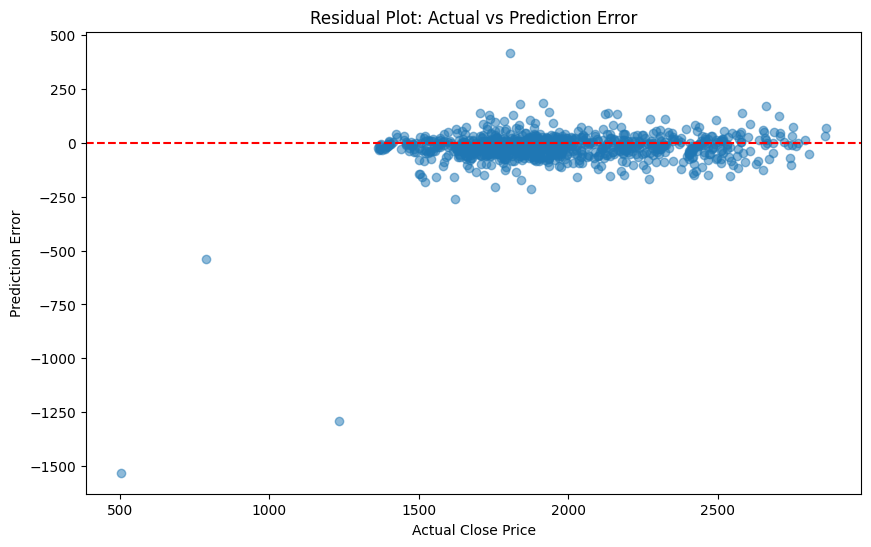

In [269]:
# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(scaler.inverse_transform(y_test.reshape(-1, 1)), prediction_errors, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Close Price')
plt.ylabel('Prediction Error')
plt.title('Residual Plot: Actual vs Prediction Error')
plt.show()

The residual plot suggests that the model's predictions are relatively accurate and unbiased. The random scatter of points and consistent spread indicate that the model's errors are not systematically related to the actual values. However, the presence of a few outliers suggests that there might be room for improvement in the model's performance.

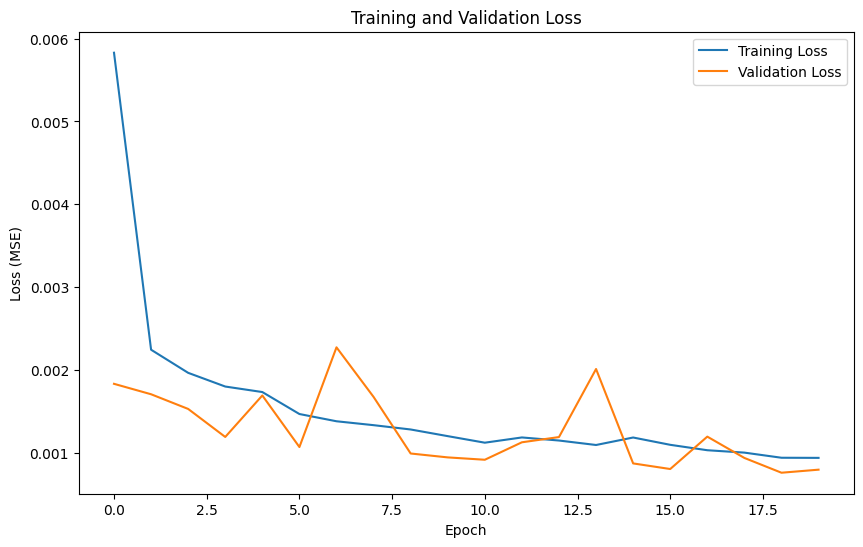

In [270]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

The plot shows the training and validation loss of a model over 20 epochs. Here are the key observations:

**Training Loss:**

The training loss decreases rapidly in the initial epochs and then plateaus, indicating that the model is learning effectively from the training data.

The final training loss is relatively low, suggesting that the model has learned to fit the training data well.

**Validation Loss:**

The validation loss initially decreases but then starts to fluctuate. This suggests that the model is starting to overfit to the training data, and its performance on unseen data is not improving.

The final validation loss is higher than the training loss, confirming that the model is overfitting.

**Overall:**

The model performs well on the training data but struggles to generalize to unseen data.

The model is likely overfitting, and further training might not improve its performance.

To address overfitting, techniques like early stopping or regularization could be employed.

In conclusion, the plot suggests that the model needs to be adjusted to prevent overfitting and improve its generalization performance.